In [2]:
import lasio
import numpy as np
import pandas as pd


import matplotlib.pyplot as plt
import plotly.graph_objects as go

from welly import Well
from welly import Synthetic

%matplotlib inline

In [3]:
import math

In [4]:
well_6_composite_las = lasio.read("../data/PETROPHYSICS/WELL-6_COMPOSITE.LAS")

Header section Parameter regexp=~P was not found.
/data/anaconda/envs/nazmi-py37/lib/python3.7/site-packages/lasio/las.py:255: FutureWarning:

elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison



In [5]:
DEPTH_data = well_6_composite_las.curves["DEPTH"].data
CALI_data = well_6_composite_las.curves["CALI"].data
DENB_data = well_6_composite_las.curves["DENB"].data
DRHO_data = well_6_composite_las.curves["DRHO"].data
DTCOMP_data = well_6_composite_las.curves["DTCOMP"].data
GR_data = well_6_composite_las.curves["GR"].data
NEUT_data = well_6_composite_las.curves["NEUT"].data
PEF_data = well_6_composite_las.curves["PEF"].data
RDEEP_data = well_6_composite_las.curves["RDEEP"].data
RMICRO_data = well_6_composite_las.curves["RMICRO"].data
RSHAL_data = well_6_composite_las.curves["RSHAL"].data

In [6]:
all_data = {
  "DEPTH_data": DEPTH_data,
  "CALI_data": CALI_data, # G
  "DENB_data": DENB_data, # D
  "DRHO_data": DRHO_data, 
  "DTCOMP_data": DTCOMP_data, # D
  "GR_data": GR_data, # G
  "NEUT_data": NEUT_data, # D
  "PEF_data": PEF_data,
  "RDEEP_data": RDEEP_data, # R
  "RMICRO_data": RMICRO_data, # R
  "RSHAL_data": RSHAL_data # R
}

# for datum in all_data.keys():
#     print(datum)
#     x = np.arange(len(all_data[datum]))
#     fig = go.Figure(data=go.Scatter(x=x, y=all_data[datum]))
#     fig.show()

In [8]:
all_data

{'DEPTH_data': array(['328.7268,', '328.8792,', '329.0316,', ..., '1544.8788,',
        '1545.0312,', '1545.1836,'], dtype='<U12'),
 'CALI_data': array(['19.6406,', '19.6250,', '19.6250,', ..., '8.1328,', '8.1328,',
        '8.1328,'], dtype='<U12'),
 'DENB_data': array(['-999.2500,', '-999.2500,', '-999.2500,', ..., '-999.2500,',
        '-999.2500,', '-999.2500,'], dtype='<U12'),
 'DRHO_data': array(['-999.250000,', '-999.250000,', '-999.250000,', ...,
        '-999.250000,', '-999.250000,', '-999.250000,'], dtype='<U12'),
 'DTCOMP_data': array(['-999.2500,', '-999.2500,', '-999.2500,', ..., '-999.2500,',
        '-999.2500,', '-999.2500,'], dtype='<U12'),
 'GR_data': array(['-999.2500,', '-999.2500,', '-999.2500,', ..., '-999.2500,',
        '-999.2500,', '-999.2500,'], dtype='<U12'),
 'NEUT_data': array(['-999.250000,', '-999.250000,', '-999.250000,', ...,
        '-999.250000,', '-999.250000,', '-999.250000,'], dtype='<U12'),
 'PEF_data': array(['-999.2500,', '-999.2500,', '-999.2

In [11]:
def myfun(array):
    val = [];
    d = np.array(array);
    for x in array:
        d = x.replace(",","")
        val.append(float(d))
    return val;

In [12]:
depth = myfun(DEPTH_data)
cali = myfun(CALI_data)
denb = myfun(DENB_data)
dtcomp = myfun(DTCOMP_data)
gr = myfun(GR_data)
neut = myfun(NEUT_data)
rdeep = myfun(RDEEP_data)
rmicro = myfun(RMICRO_data)
rshal = myfun(RSHAL_data)



In [ ]:
plt.plot(cali,depth)

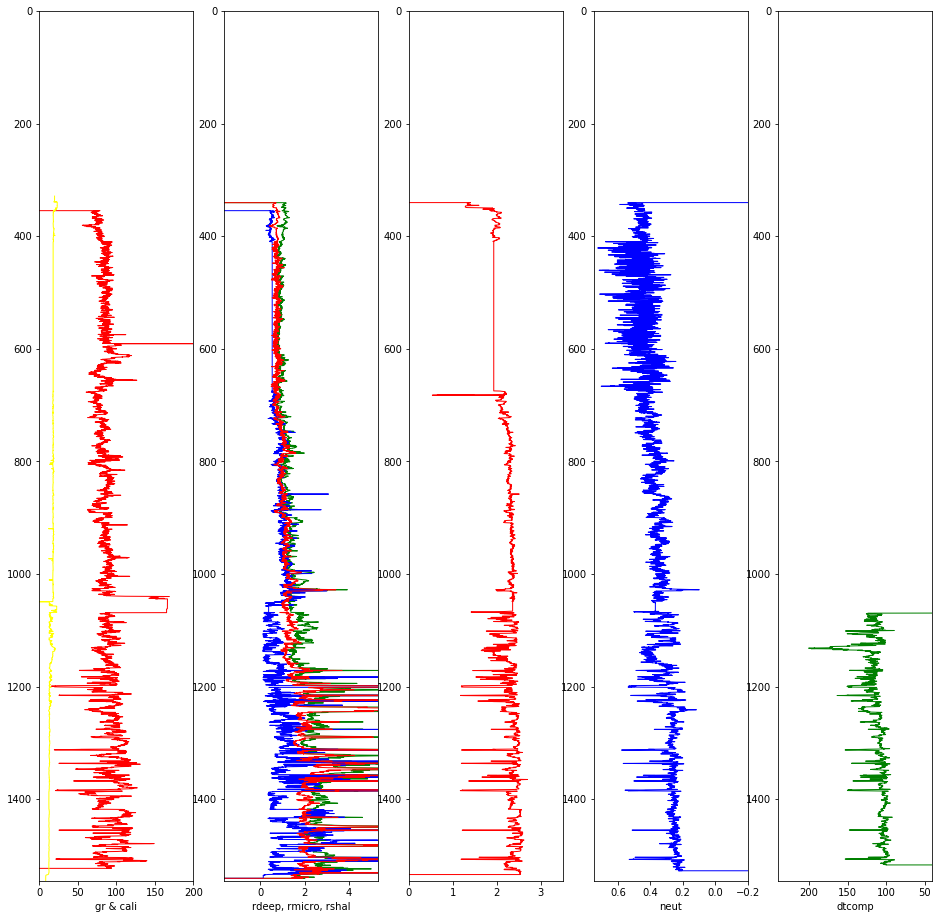

In [17]:
lineweight = 1

plot_min = 0
plot_max = 200


# Set up the figure. 
fig = plt.figure(figsize=(16,16))

##################################################################
# Plot into the figure.
# First, the lith log, the full width of the log. 
ax = fig.add_subplot(151)

# Plot the DT with a white fill to fake the curve fill.
ax.plot(gr, depth, color='red', lw=lineweight)
ax.plot(cali, depth, color='yellow', lw=lineweight)
ax.fill_betweenx(depth, gr, plot_max, color='w', zorder = 2)
ax.set_xlabel("gr & cali")

# Limit axes. 
ax.set_xlim(0, 200)
ax.set_ylim(depth[-1], 0)

##################################################################
# Plot into the figure.
# First, the lith log, the full width of the log. 
ax1 = fig.add_subplot(152)

# Plot the DT with a white fill to fake the curve fill.
ax1.plot(rdeep, depth, color='green', lw=lineweight)
ax1.plot(rmicro, depth, color='blue', lw=lineweight)
ax1.plot(rshal, depth, color='red', lw=lineweight)
ax1.fill_betweenx(depth, neut, plot_max, color='w', zorder = 2)

ax1.set_xlabel("rdeep, rmicro, rshal")

# Limit axes. 
ax1.set_xlim(math.log(0.2), math.log(200))
ax1.set_ylim(depth[-1], 0)

###################################################################
# Plot into the figure.
# First, the lith log, the full width of the log. 
ax2 = fig.add_subplot(153)

# Plot the DT with a white fill to fake the curve fill.
ax2.plot(denb, depth, color='red', lw=lineweight)
ax2.fill_betweenx(depth, neut, plot_max, color='w', zorder = 2)

# Limit axes. 
ax2.set_xlim(0, 3.5)
ax2.set_ylim(depth[-1], 0)
##################################################################

# Plot into the figure.
# First, the lith log, the full width of the log. 
ax3 = fig.add_subplot(154)

# Plot the DT with a white fill to fake the curve fill.
ax3.plot(neut, depth, color='blue', lw=lineweight)
ax3.fill_betweenx(depth, neut, plot_max, color='w', zorder = 2)

ax3.set_xlabel("neut")

# Limit axes. 
ax3.set_xlim(0.75, -0.20)
ax3.set_ylim(depth[-1], 0)
##################################################################

# Plot into the figure.
# First, the lith log, the full width of the log. 
ax4 = fig.add_subplot(155)

# Plot the DT with a white fill to fake the curve fill.
ax4.plot(dtcomp, depth, color='green', lw=lineweight)
ax4.fill_betweenx(depth, neut, plot_max, color='w', zorder = 2)

ax4.set_xlabel("dtcomp")

# Limit axes. 
ax4.set_xlim(240, 40)
ax4.set_ylim(depth[-1], 0)
##################################################################

#fig.lines.extend([ax,ax1])
# Show the figure.
#plt.savefig('/home/matt/filled_log.png')
plt.show()